<a href="https://colab.research.google.com/github/oliverquintana/CerebralTumorClasification/blob/master/TumorSegmentationAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

def get_images(mypath):

    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    onlyfiles.sort()
    images = np.empty(len(onlyfiles), dtype=object)
    images = np.zeros((len(onlyfiles), 64, 64))
    
    for n in range(len(onlyfiles)):
        temp = cv2.imread( join(mypath,onlyfiles[n]), 0)
        images[n] = cv2.resize(temp, (64, 64), interpolation = cv2.INTER_AREA)
        

    return images

def get_labels(array):
    labels = []
    for i in array:
        if np.max(i) > 0:
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(labels)

training_images_path = "/content/drive/My Drive/Dataset MRI/tumor_images"
training_labels_path = "/content/drive/My Drive/Dataset MRI/tumor_masks"
validation_images_path = "/content/drive/My Drive/Dataset MRI/tumor_images_val"
validation_labels_path = "/content/drive/My Drive/Dataset MRI/tumor_masks_val"

training_images = get_images(training_images_path)
training_masks = get_images(training_labels_path)
training_labels = get_labels(training_masks)
validation_images = get_images(validation_images_path)
validation_masks = get_images(validation_labels_path)
validation_labels = get_labels(validation_masks)


In [6]:

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(4096,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(4096, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#from keras.datasets import mnist
import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()

x_train = training_images
#x_train = training_masks
x_test = validation_images
#x_test = validation_masks
y_train = training_masks
y_test = validation_masks

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

y_train = y_train.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.
y_train = y_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
y_test = y_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, y_train,
                epochs=250, # 77
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, y_test))


# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(63, 4096)
(20, 4096)



Train on 63 samples, validate on 20 samples
Epoch 1/250





63/63 [==============================] - 5s 73ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 2/250
63/63 [==============================] - 0s 150us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 3/250
63/63 [==============================] - 0s 155us/step - loss: 0.6931 - val_loss: 0.6930
Epoch 4/250
63/63 [==============================] - 0s 95us/step - loss: 0.6930 - val_loss: 0.6929
Epoch 5/250
63/63 [==============================] - 0s 126us/step - loss: 0.6928 - val_loss: 0.6927
Epoch 6/250
63/63 [==============================] - 0s 95us/step - loss: 0.6927 - val_loss: 0.6926
Epoch 7/250
63/63 [==============================] - 0s 84us/step - loss: 0.6926 - val_loss: 0.6925
Epoch 8/250
63/63 [==============================] - 0s 98us/step - loss: 0.6925 - val_loss: 0.6924
Epoch 9/250
63/63 [=====

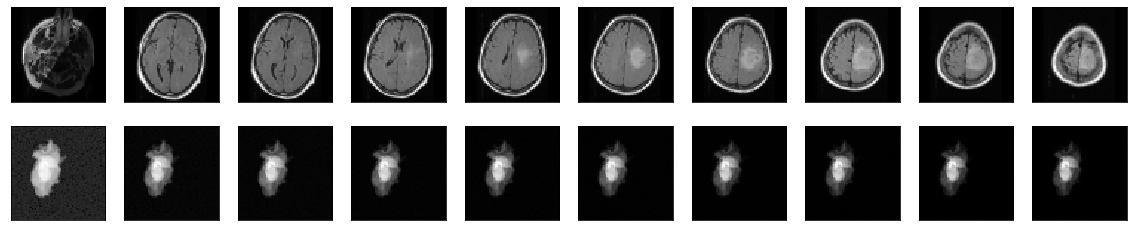

In [7]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()